In [189]:
import csv
import numpy as np
import math

In [190]:
# read file and store to numpy array
A = []
B = []
C = []
with open('data_minibatch.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        row = [float(x) for x in row]
        A.append(row[0])
        B.append(row[1])
        C.append(row[2])
A = np.array(A)
B = np.array(B)
C = np.array(C)

In [191]:
def f(x):
    return np.sum(A + (B * x) + (1/2 * (C * math.pow(x,2))))

In [192]:
def f_gradient(x):
    return np.sum(B + (C * x))

In [193]:
def f_hessian():
    return np.sum(C)

In [194]:
# 2.1 
# f(x) is Lipchitz continiously differentiable if L > 0
L = np.sum(C)
print('L: {:.3f}'.format(L))
if L > 0:
    print('f(x) is Lipchitz continiously differentiable')
print('Range of step size: 0 < t < {:.3f}\n'.format(2/L))

# find x*, p*
x_opt = -np.sum(B)/np.sum(C)
print('x* is {:.3f} (hessian of f(x*) = {:.3f})'.format(x_opt, f_hessian()))
p_opt = f(x_opt)
print('p* is {:.3f}'.format(p_opt))

L: 166.644
f(x) is Lipchitz continiously differentiable
Range of step size: 0 < t < 0.012

x* is -0.115 (hessian of f(x*) = 166.644)
p* is -0.441


In [195]:
# f_i for mini batch
def f_i(x, i):
    return A[i] + (B[i] * x) + (1/2 * (C[i] * math.pow(x,2)))
def search_direction(x, k, i):
    b = B[i:i+k]
    c = C[i:i+k]
    return - np.sum(b + (c * x))

In [234]:
def mini_batch(N,k,t):
    epoch = 5
    # print('epoch:',epoch)
    # initial x0
    x_prev = 1   
    f_hist = [f(x_prev)]
    for e in range(epoch):
        i = 0
        # f_epoch = []
        for n in range(1,N//k + 1):
            # print('i:', i)
            x = x_prev + (t * (search_direction(x_prev, k, i)))   
            f_hist.append(f(x))    
            x_prev = x
            i += k
        # f_hist.append(f(x))
    return f_hist


1001 -0.440530334298435
51 -0.4398084968217346
21 -0.4404083135044181


TypeError: 'str' object is not callable

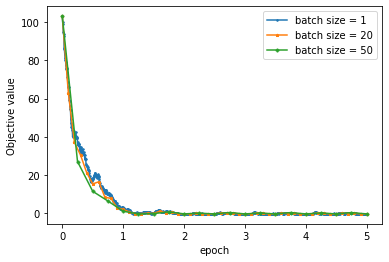

In [243]:
N = A.shape[0]
t = 0.01

# output
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
k = 1 #batch_size
f_hist_1 = mini_batch(N,k,t)
print(len(f_hist_1), min(f_hist_1))
plt.plot([x/(N//k) for x in range(len(f_hist_1))], f_hist_1,marker='.', markersize=3, label='batch size = 1')

k = 20 #batch_size
f_hist_20 = mini_batch(N,k,t)
print(len(f_hist_20), min(f_hist_20))
plt.plot([x/(N//k) for x in range(len(f_hist_20))], f_hist_20,marker='*', markersize=3, label='batch size = 20')

k = 50 #batch_size
f_hist_50 = mini_batch(N,k,t)
print(len(f_hist_50), min(f_hist_50))
plt.plot([x/(N//k) for x in range(len(f_hist_50))], f_hist_50,marker='P', markersize=3, label='batch size = 50')
plt.xlabel("epoch")
plt.ylabel("Objective value")
plt.legend(loc='upper right')
plt.title('plt.step(where=...)')
plt.show()


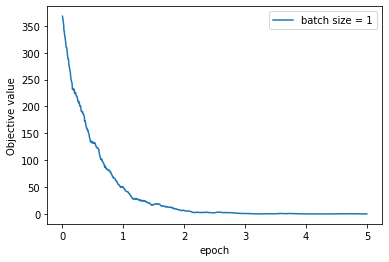

In [200]:
N = A.shape[0]
k = 1 #batch_size
f_hist_1 = mini_batch(N,k, 1/L)
# output
import matplotlib.pyplot as plt
plt.plot([x/(N/k)  for x in range(len(f_hist_1))], f_hist_1, label='batch size = 1')
plt.xlabel("epoch")
plt.ylabel("Objective value")
plt.legend(loc='upper right')
plt.show()

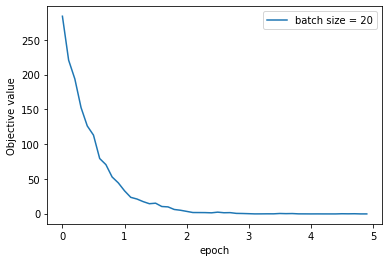

In [201]:
N = A.shape[0]
k = 20 #batch_size
f_hist_1 = mini_batch(N,k, 1/L)
# output
import matplotlib.pyplot as plt
plt.plot([x/(N/k)  for x in range(len(f_hist_1))], f_hist_1, label='batch size = 20')
plt.xlabel("epoch")
plt.ylabel("Objective value")
plt.legend(loc='upper right')
plt.show()

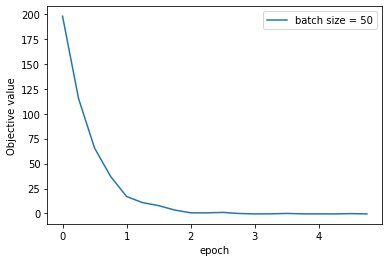

In [202]:
N = A.shape[0]
k = 50 #batch_size
f_hist_1 = mini_batch(N,k, 1/L)
# output
import matplotlib.pyplot as plt
plt.plot([x/(N/k)  for x in range(len(f_hist_1))], f_hist_1, label='batch size = 50')
plt.xlabel("epoch")
plt.ylabel("Objective value")
plt.legend(loc='upper right')
plt.show()